### Context
Background and Context:

Twitter posses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/services on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand, and their competitors, and discover new trends in the industry.

 

Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### High Level Steps to be Followed
Steps and tasks:

1. Import the libraries, load dataset, the print shape of data, data description. (5 Marks)
2. Understand of data columns: (5 Marks)<br/>
     a. Drop all other columns except “text” and “airline_sentiment”.<br/>
     b. Check the shape of the data.<br/>
     c. Print the first 5 rows of data.<br/>
3. Text pre-processing: Data preparation. (16 Marks)<br/>
NOTE:- Each text pre-processing step should be mentioned in the notebook separately.<br/>
     a. Html tag removal.<br/>
     b. Tokenization.<br/>
     c. Remove the numbers<br/>
     d. Removal of Special Characters and Punctuations.<br/>
     e. Removal of stopwords<br/>
     f. Conversion to lowercase.<br/>
     g. Lemmatize or stemming.<br/>
     h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)<br/>
     i. Print the first 5 rows of data after pre-processing.<br/>
4. Vectorization: (10 Marks)<br/>
    a. Use CountVectorizer.<br/>
    b. Use TfidfVectorizer.<br/>
5. Fit and evaluate the model using both types of vectorization. (6+6 Marks)<br/>
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and the performance of your model on this dataset. (8 Marks)<br/>
7.Overall notebook should have:(4 Marks)<br/>
     a. Well commented code<br/>
     b. Structure and flow<br/>

### Pre-Steps

#### Import Libraries

In [ ]:
# Import Core Libraries
import numpy as np
import pandas as pd

# For Plotting Graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Pre-Processing Libs
# For Regular Expression and text Clean up
import re

#Import BeautifulSoup for HTML Stripping
from bs4 import BeautifulSoup     

#Import NLTK Library Used for different task of NLP
import nltk     

# For Stop Words Removal
from nltk.corpus import stopwords  

# For Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

# For Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

# For TF/IDF 
from sklearn.feature_extraction.text import TfidfVectorizer

# Import Package Dependencies
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# For Splitting your Test and Train datasets
from sklearn.model_selection import train_test_split
# For Building the Confusion Matrix
from sklearn.metrics import confusion_matrix
# For measuring model performance
from sklearn import metrics
from sklearn.metrics import classification_report
# For Model Tuning
from sklearn.model_selection import RandomizedSearchCV

# For Building the model for Classification of reviews
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# For Features Visualization
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Load Dataset

In [ ]:
# The data set is stored on my Google Drive
# I will add a piece of code to allow Google Colab to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the supplied CSV file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Natural Language Processing/Tweets.csv")

#### Data Shape

In [ ]:
df.shape

(14640, 15)

#### Data Description

In [ ]:
# Describe the data
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### Understand of Data Columns

In [ ]:
# Print the first 5 rows of data
# to get an idea on what the data looks like
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Check for any null data
df[['airline_sentiment','text']].isna().sum()

airline_sentiment    0
text                 0
dtype: int64

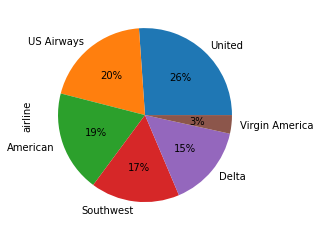

In [ ]:
# get an idea of how the feedback received is 
# distributed across the different airlines
df.airline.value_counts().plot(kind='pie', autopct='%.0f%%')

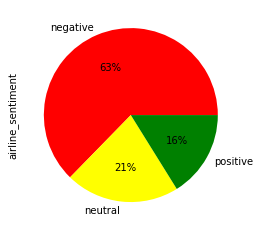

In [ ]:
# Check the sentiment class distribution (% of negative, positive, and neutral)
df.airline_sentiment.value_counts().plot(kind='pie', autopct='%.0f%%', colors=["red", "yellow", "green"])


In [ ]:
# Drop all other/unecessary columns except “text” and “airline_sentiment”
df.drop(df.columns.difference(['text','airline_sentiment']),axis=1,inplace=True)

#### Shape of Data

In [ ]:
# Check the shape of data
df.shape

(14640, 2)

#### Insights
* Looking at the dataset, there are many object type features and some of them have null values. We will not attempt to treat missing data since we will be dropping them
* The highest airlines with feedback is United with 26% followed by US Airways with 20% 
* The two column that we will keep for our data analysis do not have null values so we are all set from that perspective
* The sentiment class is imbalanced: 63% of the feedback has negative sentiment, followed with 21% neutral and 16% positive

### Text pre-processing: Data preparation
In order to prepare the data to be inputed into the model, it must be converted from an unstructured to a structured form, and then converted from text to numbers and into a vector form. In that process, we will attempt to clean up the data by:
* Removing HTML tags that might exist in the data
* Tokenize the text
* Remove any numbers
* Remove special characters and punctuations
* Remove stop words
* Convert text to lowercase - since the model will see same word with different letter case different
* Lemmatize the text to ensure same words with different forms, etc... are brough to their base, so we do not treat each form as a different word
* and finally, we willjoin the words that we had tokenized above back in a list to get it ready to vectorize the text



#### Html tag removal

In [ ]:
# Define a function to strip HTML
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    html_free_text = soup.get_text()
    return html_free_text

In [ ]:
df['text'] = df['text'].apply(lambda x: strip_html_tags(x))

In [ ]:
df['text'].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

#### Tokenization

In [ ]:
# Tokenize the text by looping through each row of the dataframe Series "text"
for i, row in df.iterrows():
    tokenized_text = nltk.word_tokenize(df.at[i, 'text'])
    df.at[i,'text'] = tokenized_text

df['text']

0           [@, VirginAmerica, What, @, dhepburn, said, .]
1        [@, VirginAmerica, plus, you, 've, added, comm...
2        [@, VirginAmerica, I, did, n't, today, ..., Mu...
3        [@, VirginAmerica, it, 's, really, aggressive,...
4        [@, VirginAmerica, and, it, 's, a, really, big...
                               ...                        
14635    [@, AmericanAir, thank, you, we, got, on, a, d...
14636    [@, AmericanAir, leaving, over, 20, minutes, L...
14637    [@, AmericanAir, Please, bring, American, Airl...
14638    [@, AmericanAir, you, have, my, money, ,, you,...
14639    [@, AmericanAir, we, have, 8, ppl, so, we, nee...
Name: text, Length: 14640, dtype: object

#### Removing Numbers

In [ ]:
# We will use regular expressions to clean up the text and remove digits
def remove_numbers(words):  
  processed_words = []  
  for word in words:
    # Substitute pattern with nothing
    no_digit = re.sub(r'\d+','',word)
    # Check to make sure the word is not empty
    if no_digit!='':
      processed_words.append(no_digit)
  return processed_words

In [ ]:
df['text'] = df['text'].apply(lambda x: remove_numbers(x))
df['text']

0           [@, VirginAmerica, What, @, dhepburn, said, .]
1        [@, VirginAmerica, plus, you, 've, added, comm...
2        [@, VirginAmerica, I, did, n't, today, ..., Mu...
3        [@, VirginAmerica, it, 's, really, aggressive,...
4        [@, VirginAmerica, and, it, 's, a, really, big...
                               ...                        
14635    [@, AmericanAir, thank, you, we, got, on, a, d...
14636    [@, AmericanAir, leaving, over, minutes, Late,...
14637    [@, AmericanAir, Please, bring, American, Airl...
14638    [@, AmericanAir, you, have, my, money, ,, you,...
14639    [@, AmericanAir, we, have, ppl, so, we, need, ...
Name: text, Length: 14640, dtype: object

#### Removal of Special Characters and Punctuations.


In [ ]:
# We will use regular expressions to clean up the text 
# and remove anything that is not between a->z or A->Z 
def remove_special_characters(words):
  pattern = r'[^a-zA-z\s]'
  processed_words = []  
  for word in words:
    # Substitute pattern with nothing        
    no_special_chars =  re.sub(pattern,'',word)
    # Check to make sure the word is not empty
    if no_special_chars!='':
      processed_words.append(no_special_chars)
  return processed_words

In [ ]:
df['text'] = df['text'].apply(lambda x: remove_special_characters(x))

In [ ]:
df['text']

0                    [VirginAmerica, What, dhepburn, said]
1        [VirginAmerica, plus, you, ve, added, commerci...
2        [VirginAmerica, I, did, nt, today, Must, mean,...
3        [VirginAmerica, it, s, really, aggressive, to,...
4        [VirginAmerica, and, it, s, a, really, big, ba...
                               ...                        
14635    [AmericanAir, thank, you, we, got, on, a, diff...
14636    [AmericanAir, leaving, over, minutes, Late, Fl...
14637    [AmericanAir, Please, bring, American, Airline...
14638    [AmericanAir, you, have, my, money, you, chang...
14639    [AmericanAir, we, have, ppl, so, we, need, kno...
Name: text, Length: 14640, dtype: object

#### Removal of stopwords

In [ ]:
# Remove a list of words that do not add much value 
# to the mode. These words are like 'a', 'the', or pronouns such as 'he/she, they, I, etc...'
stopwords = stopwords.words('english')

In [ ]:
def remove_stopwords(text):
  no_stop_words = []
  # Loop through all words and check each one to
  # make sure it is not in the list of stop words
  for word in text:
    if word not in stopwords:
      # Append the words back if they are not
      # in the list of stop words
      no_stop_words.append(word)
  return no_stop_words

In [ ]:
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

In [ ]:
df['text']

0                    [VirginAmerica, What, dhepburn, said]
1        [VirginAmerica, plus, added, commercials, expe...
2        [VirginAmerica, I, nt, today, Must, mean, I, n...
3        [VirginAmerica, really, aggressive, blast, obn...
4                 [VirginAmerica, really, big, bad, thing]
                               ...                        
14635    [AmericanAir, thank, got, different, flight, C...
14636    [AmericanAir, leaving, minutes, Late, Flight, ...
14637    [AmericanAir, Please, bring, American, Airline...
14638    [AmericanAir, money, change, flight, nt, answe...
14639    [AmericanAir, ppl, need, know, many, seats, ne...
Name: text, Length: 14640, dtype: object

#### Conversion to lowercase.

In [ ]:
# Convert the text to lower case
def convert_to_lowercase(text):
  lower_case_text = []
  for word in text:
    lower_case_text.append(word.lower())
  return lower_case_text

In [ ]:
df['text'] = df['text'].apply(lambda x: convert_to_lowercase(x))

In [ ]:
df['text']

0                    [virginamerica, what, dhepburn, said]
1        [virginamerica, plus, added, commercials, expe...
2        [virginamerica, i, nt, today, must, mean, i, n...
3        [virginamerica, really, aggressive, blast, obn...
4                 [virginamerica, really, big, bad, thing]
                               ...                        
14635    [americanair, thank, got, different, flight, c...
14636    [americanair, leaving, minutes, late, flight, ...
14637    [americanair, please, bring, american, airline...
14638    [americanair, money, change, flight, nt, answe...
14639    [americanair, ppl, need, know, many, seats, ne...
Name: text, Length: 14640, dtype: object

#### Lemmatize or stemming

In [ ]:
# Using WordNetLemmatizer to conducting
# words lemmatization
lemmatizer = WordNetLemmatizer()

In [ ]:
# Define the function for text lemmatization
def lemmatize_text(text):
  lemmatized_text = []
  for word in text:
    lemmatized_text.append(lemmatizer.lemmatize(word))
  return lemmatized_text

In [ ]:
# Apply the lemmatization on all the data set for the feature "text"
df['text'] = df['text'].apply(lambda x: lemmatize_text(x))

In [ ]:
df['text']

0                    [virginamerica, what, dhepburn, said]
1        [virginamerica, plus, added, commercial, exper...
2        [virginamerica, i, nt, today, must, mean, i, n...
3        [virginamerica, really, aggressive, blast, obn...
4                 [virginamerica, really, big, bad, thing]
                               ...                        
14635    [americanair, thank, got, different, flight, c...
14636    [americanair, leaving, minute, late, flight, n...
14637    [americanair, please, bring, american, airline...
14638    [americanair, money, change, flight, nt, answe...
14639    [americanair, ppl, need, know, many, seat, nex...
Name: text, Length: 14640, dtype: object

#### List Conversion Back to Text

In [ ]:
def convert_list_to_text (list):
  return ' '.join(list)

In [ ]:
df['text'] = df['text'].apply(lambda x: convert_list_to_text(x))

In [ ]:
# Show first five records
df['text']

0                         virginamerica what dhepburn said
1        virginamerica plus added commercial experience...
2        virginamerica i nt today must mean i need take...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving minute late flight no warn...
14637    americanair please bring american airline blac...
14638    americanair money change flight nt answer phon...
14639    americanair ppl need know many seat next fligh...
Name: text, Length: 14640, dtype: object

### Vectorization
* We are using Vectorization which is a crucial pre-step before fitting the model to convert the text to numbers. 
* Using two methods of Vectorization: Count Vectorizer and TF/IDF
* Count Vectorizer uses equal weights for all words in the vocabulary
* TF/IDF Vectorizer gives more weight to less frequent words


#### Using Count Vectorizer

In [ ]:
# Initialize Object Instance
count_vectorizer = CountVectorizer(max_features=1000)
token_count = count_vectorizer.fit_transform(df['text'])

In [ ]:
# Check the length of the vocabulary
print(len(count_vectorizer.vocabulary_))

1000


In [ ]:
# Convert it to an array
token_count = token_count.toarray()

In [ ]:
token_count.shape

(14640, 1000)

#### Using TF/IDF Vectorizer

In [ ]:
# Initialize the TF/DIF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [ ]:
tfidf_vectorized = tfidf_vectorizer.fit_transform(df['text'])

In [ ]:
len(tfidf_vectorizer.vocabulary_)

1000

In [ ]:
tfidf_vectorized.shape

(14640, 1000)

### Model
We could have used different algorithms, for this project I decided to use Random Forest Classifier for building the model

In [ ]:
scores = []
models = []

In [ ]:
# Encode Ordinal Values
# We will use a three-point scale for the class variable
# 0 = negative, 1 = neutral, 2 = positive
airline_sentiment_dic = {"positive":2, "neutral":1,"negative":0}
df["airline_sentiment"] = df["airline_sentiment"].map(airline_sentiment_dic)

In [ ]:
# Save the class under the variable labels
labels = df['airline_sentiment']
labels

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

#### Model Based on Count Vectorization

In [ ]:
# Split train and test set for Count Vectorization
cv_X_train, cv_X_test, cv_y_train, cv_y_test = train_test_split(token_count, labels, test_size=0.3, random_state=30)

In [ ]:
# Initialize the model using Random Forest Classifier
rf = RandomForestClassifier (n_estimators=10, n_jobs=6)

In [ ]:
# Fit the model
cv_model = rf.fit(cv_X_train, cv_y_train)

In [ ]:
print(cv_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=6,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [ ]:
# Generate the Cross Validation Scores based on 
cv_score = np.mean(cross_val_score(cv_model, token_count, labels, cv=5))

In [ ]:
cv_score

0.6800546448087431

In [ ]:
scores.append(cv_score)

In [ ]:
models.append('Random Forest with CV')

#### Model Based on TF/IDF Vectorization

In [ ]:
tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(tfidf_vectorized, labels, test_size=0.3, random_state=30)

In [ ]:
rf = RandomForestClassifier (n_estimators=10, n_jobs=6)

In [ ]:
tfidf_model = rf.fit(tfidf_X_train, tfidf_y_train)

In [ ]:
print(tfidf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=6,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [ ]:
tfidf_score = np.mean(cross_val_score(tfidf_model, tfidf_vectorized, labels, cv=5))

In [ ]:
tfidf_score

0.6918715846994535

In [ ]:
scores.append(tfidf_score)

In [ ]:
models.append('Random Forest with TF/IDF')

#### Optimizing Models
* We will attempt to tune the models using couple of things:
1. We will attempt to find the best number of base estimators using K-Fold Cross Validation
2. We will attempt to increase the number of max features from 1000 to 3000 for both Count Vectorization and TF/IDF to see how the model scores change

In [ ]:
def get_base_learners(start_range, end_range):
  # Finding optimal number of base learners using k-fold CV ->
  return [x for x in range(start_range, end_range)]


In [ ]:
# K - Fold Cross Validation .
def get_cv_scores(xdata, ydata, range):
  cv_scores = []
  for r in range:
    rf = RandomForestClassifier(n_estimators = r)
    scores = cross_val_score(rf, xdata, ydata, cv = 5, scoring = 'accuracy', n_jobs=-1)
    cv_scores.append(scores.mean())
  return cv_scores

In [ ]:
def plot_and_get_optimal_learners(cv_scores, range):
  # plotting the error as k increases

  #error corresponds to each nu of estimator
  error = [1 - x for x in cv_scores]                                 

  #Selection of optimal n_estimator corresponds to minimum error.
  optimal_learners = range[error.index(min(error))]             

  #Plot between each n_estimator and misclassification error
  plt.plot(range, error)                                           
  xy = (optimal_learners, min(error))
  plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
  plt.xlabel("Number of base learners")
  plt.ylabel("Misclassification Error")
  plt.show()
  return optimal_learners

In [ ]:
# Define the Confusion Matrix Function
def draw_confusion_matrix (y_test, model_predictions):
  cm = confusion_matrix(y_test, model_predictions)
  print(cm)
  print(metrics.f1_score(y_test, model_predictions,average='micro'))

  df_cm = pd.DataFrame(cm, index = [i for i in "123"],
                    columns = [i for i in "123"])
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, annot=True, fmt='g')

In [ ]:
n_estimators = get_base_learners(1,30)

In [ ]:
target_names = ['Negative', 'Neutral', 'Positive']

#### Cross Validation For Model Selection - Count Vectorization
Finding the optimal number of base estimators



In [ ]:
cv_scores = get_cv_scores(cv_X_train, cv_y_train, n_estimators)

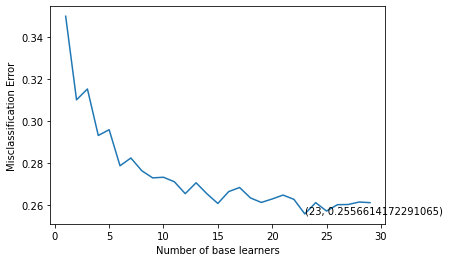

In [ ]:
# Count Vectorization Optimal Learners
# Plot the Classification Error to find the optimal
# number of base learners
cv_optimal_learners = plot_and_get_optimal_learners(cv_scores,n_estimators)

In [ ]:
print (cv_optimal_learners)

23


In [ ]:
# Training the best model and calculating accuracy on test data .
cv_tuned_model = RandomForestClassifier(n_estimators = cv_optimal_learners)
cv_tuned_model.fit(cv_X_train, cv_y_train)
cv_tuned_model.score(cv_X_test, cv_y_test)

0.7465846994535519

In [ ]:
scores.append(cv_tuned_model.score(cv_X_test, cv_y_test))

In [ ]:
models.append('Random Forest with CV - Tuned')

In [ ]:
cv_y_pred = cv_tuned_model.predict(cv_X_test)

[[2412  231  108]
 [ 356  455  118]
 [ 195  105  412]]
0.746584699453552


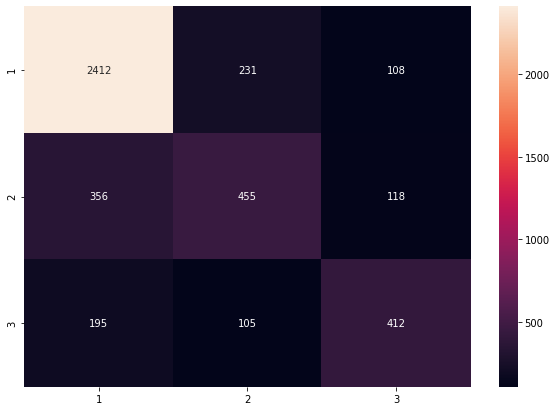

In [ ]:
draw_confusion_matrix (cv_y_test,cv_y_pred)

In [ ]:
print(classification_report(cv_y_test, cv_y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.81      0.88      0.84      2751
     Neutral       0.58      0.49      0.53       929
    Positive       0.65      0.58      0.61       712

    accuracy                           0.75      4392
   macro avg       0.68      0.65      0.66      4392
weighted avg       0.74      0.75      0.74      4392



#### Cross Validation For Model Selection - TF/IDF Vectorization
Finding the optimal number of base estimators

In [ ]:
tfidf_scores = get_cv_scores(tfidf_X_train, tfidf_y_train, n_estimators)

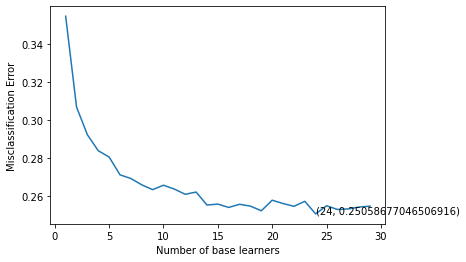

In [ ]:
# Count Vectorization Optimal Learners
# Plot the Classification Error to find the optimal
# number of base learners
tfidf_optimal_learners = plot_and_get_optimal_learners(tfidf_scores,n_estimators)

In [ ]:
print (tfidf_optimal_learners)

24


In [ ]:
# Training the best model and calculating accuracy on test data .
tfidf_tuned_model = RandomForestClassifier(n_estimators = tfidf_optimal_learners)
tfidf_tuned_model.fit(tfidf_X_train, tfidf_y_train)
tfidf_tuned_model.score(tfidf_X_test, tfidf_y_test)

0.7511384335154827

In [ ]:
scores.append(tfidf_tuned_model.score(tfidf_X_test, tfidf_y_test))

In [ ]:
models.append('Random Forest with TF/IDF - Tuned')

In [ ]:
tfidf_y_pred = tfidf_tuned_model.predict(tfidf_X_test)

[[2550  135   66]
 [ 469  377   83]
 [ 250   90  372]]
0.7511384335154827


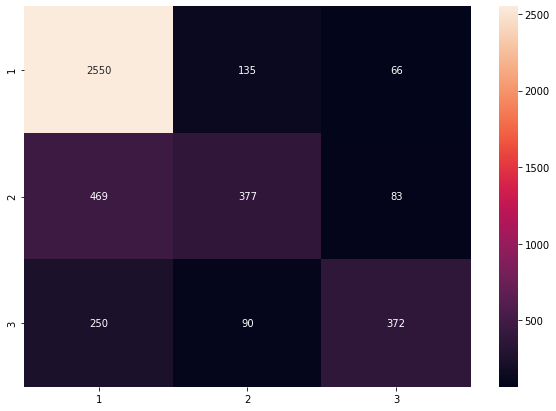

In [ ]:
draw_confusion_matrix (tfidf_y_test,tfidf_y_pred)

In [ ]:
print(classification_report(tfidf_y_test, tfidf_y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.78      0.93      0.85      2751
     Neutral       0.63      0.41      0.49       929
    Positive       0.71      0.52      0.60       712

    accuracy                           0.75      4392
   macro avg       0.71      0.62      0.65      4392
weighted avg       0.74      0.75      0.73      4392



#### Count Vectorization with no Max Features

In [ ]:
# Initialize a new count vectorizer variable with no Max Features
m_count_vectorizer = CountVectorizer()
m_token_count = m_count_vectorizer.fit_transform(df['text'])

In [ ]:
# Converting Token Count to Array
m_token_count = m_token_count.toarray()

In [ ]:
print(len(m_count_vectorizer.vocabulary_))

12999


In [ ]:
m_cv_X_train, m_cv_X_test, m_cv_y_train, m_cv_y_test = train_test_split(m_token_count, labels, test_size=0.3, random_state=30)

In [ ]:
m_cv_scores = get_cv_scores(m_cv_X_train, m_cv_y_train, n_estimators)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be 

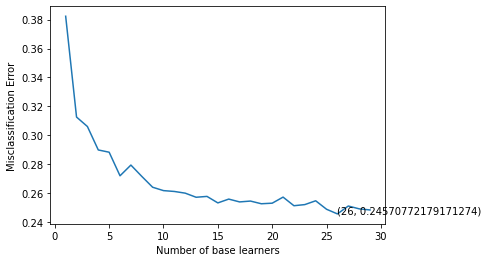

In [ ]:
# Count Vectorization Optimal Learners
# Plot the Classification Error to find the optimal
# number of base learners
m_cv_optimal_learners = plot_and_get_optimal_learners(m_cv_scores,n_estimators)

In [ ]:
# Training the best model and calculating accuracy on test data .
m_cv_tuned_model = RandomForestClassifier(n_estimators = m_cv_optimal_learners)
m_cv_tuned_model.fit(m_cv_X_train, m_cv_y_train)
m_cv_tuned_model.score(m_cv_X_test, m_cv_y_test)

0.7515938069216758

In [ ]:
scores.append(m_cv_tuned_model.score(m_cv_X_test, m_cv_y_test))
models.append('Random Forest with CV Tuned and No Max Features')

#### TF/IDF Vectorization with No Max Features

In [ ]:
# Initialize a new TFIDF vectorizer variable without 
# setting the max features. 
# Basically, pull all the data and see how the model score would change
m_tfidf_vectorizer = TfidfVectorizer()
m_token_tfidf = m_tfidf_vectorizer.fit_transform(df['text'])

In [ ]:
# Converting Token Count to Array
m_token_tfidf = m_token_tfidf.toarray()

In [ ]:
print(len(m_tfidf_vectorizer.vocabulary_))

12999


In [ ]:
# Split the train and test data for the tf/idf vectoriser Random Forest Model
m_tfidf_X_train, m_tfidf_X_test, m_tfidf_y_train, m_tfidf_y_test = train_test_split(m_token_tfidf, labels, test_size=0.3, random_state=30)

In [ ]:
m_tfidf_scores = get_cv_scores(m_tfidf_X_train, m_tfidf_y_train, n_estimators)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be 

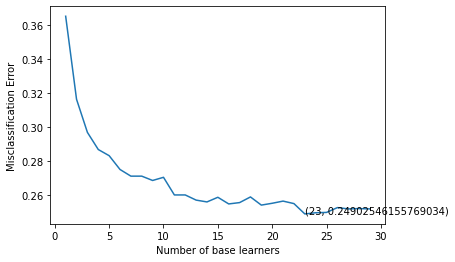

In [ ]:
# TFIDF Vectorization Optimal Learners
# Plot the Classification Error to find the optimal
# number of base learners
m_tfidf_optimal_learners = plot_and_get_optimal_learners(m_tfidf_scores,n_estimators)

In [ ]:
# Training the best model and calculating accuracy on test data .
m_tfidf_tuned_model = RandomForestClassifier(n_estimators = m_tfidf_optimal_learners)
m_tfidf_tuned_model.fit(m_tfidf_X_train, m_tfidf_y_train)
m_tfidf_tuned_model.score(m_tfidf_X_test, m_tfidf_y_test)

0.7536429872495446

In [ ]:
scores.append(m_tfidf_tuned_model.score(m_tfidf_X_test, m_tfidf_y_test))
models.append('Random Forest with TFIDF and No Max Features')

#### Scores Summary
This section displays a summary of all the mean accuracy scores of all models above

In [ ]:
scoreMatrix = (pd.DataFrame({"Model Name":models})).reset_index()

In [ ]:
scoreMatrix['Scores'] = scores

In [ ]:
scoreMatrix.drop('index',axis=1, inplace=True)

In [ ]:
scoreMatrix

,Model Name,Scores
0,Random Forest with CV,0.680055
1,Random Forest with TF/IDF,0.691872
2,Random Forest with CV - Tuned,0.746585
3,Random Forest with TF/IDF - Tuned,0.751138
4,Random Forest with CV Tuned and No Max Features,0.751594
5,Random Forest with TFIDF and No Max Features,0.753643


### Summary
* The data supplied had a multi class sentiment (Positive, Negative, and Neutral)
* We went ahead and kept them 3 categories when we encoded them to numbers
* We pre-processed and cleaned up the data from html tags, special characters, converted all text to lower case, tokenized, and lemmatized using different libraries. 
* Converted all the data to number through vectorization using two methods: Count Vectorizer and TFIDF Vectorizer
* We applied pre-processing on the data 
* We split the data into train and test sets for each vectorization technique
* Initially, we put a limit on the max number of features and reduced it from 12999 word vocabulary to 1000 and with an untuned model, the accuracy was in the high 60%
* Kept the max features set at a 1000 and tuned the number of base estimators using K-Fold and that increased the accuracy by 5% for both count vectorization and tfidf Random Forest models
* Interestingly enough, when we removed the limit on the number of word vocab/max features, the mean accuracy for both models increased by less than 1%
* For reference, included the scores summary section above shows the different scores obtained for each model 
* When we analyzed the different model scores for recall and precision, or f1 scores, all models performed poorly on the positive and neutral sentiments and okay on the negative sentiments. This was expected since the data is imbalanced towards the negative sentiment records as we saw at the beginning of the project above
* The tuning we performed were not good enough to bring the model performance to a good level. More technique can be applied to improve the performance, and that entails, doing more pre-processing and doing a hyperparameter tuning using grid or random search for finding the best hyperparameters. 
* Having said that, I attempted below to do random search, however, the computation was taking too long, so I had to commented the code
* I also used Word Cloud to give a representation of the top features/words that were presented in the datasets that had a high impact on the model performance. I included both the randomsearchCV and WordCloud in a supplemental section below


### Supplemental Information

#### *Top* Features for Count Vectorizer

In [ ]:
def get_all_features(vectorizer,model, n_top_features):
  all_features = vectorizer.get_feature_names()              #Instantiate the feature from the vectorizer
  top_features=''                                            # Addition of top 40 feature into top_feature after training the model
  feat=model.feature_importances_
  features=np.argsort(feat)[::-1]
  for i in features[0:n_top_features]:
      top_features+=all_features[i]
      top_features+=' '
  return top_features

In [ ]:
def draw_word_cloud(top_features):
  wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)
  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.figure(1, figsize=(14, 11), frameon='equal')
  plt.title('Top features WordCloud', fontsize=20)
  plt.axis("off")
  plt.show()

#### Top Features for Count Vectorization

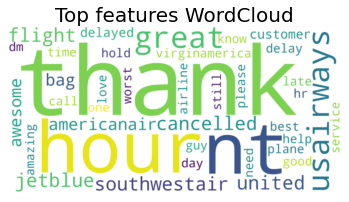

In [ ]:
cv_top_features = get_all_features (count_vectorizer,cv_tuned_model,45)
draw_word_cloud (cv_top_features)

#### Top Features for TF/IDF Vectorizer

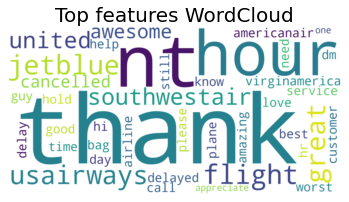

In [ ]:
tfidf_top_features = get_all_features (tfidf_vectorizer,tfidf_tuned_model,45)
draw_word_cloud (top_features)

### Hyperparameter Tuning

In [ ]:
def hypertuneModel(X_data, y_data , model, metric_score):
  %%time  
  scorer = metrics.make_scorer(metric_score)
  # Number of trees in random forest
  n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
  # Number of features to consider at every split
  max_features = ['auto', 'sqrt']
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
  max_depth.append(None)
  # Minimum number of samples required to split a node
  min_samples_split = [2, 5, 10]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [1, 2, 4]
  # Method of selecting samples for training each tree
  bootstrap = [True, False]
  # Create the random grid
  param_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                }
  #Calling RandomizedSearchCV
  randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=15, scoring=scorer, cv=5, random_state=42)
  #Fitting parameters in RandomizedSearchCV
  randomized_cv.fit(X_data,y_data)
  
  print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

  return randomized_cv

In [ ]:
# tuned_model = hypertuneModel (cv_X_train, cv_y_train, rf, metrics.accuracy_score)